DNAinfo for Machine Learning for Cities by Tengfei Zheng, Boyeong Hong and Avigail Vantu, NYU CUSP, 2016

In [1]:
import glob
import os
import json
import pandas as pd
import geopandas as gpd
%matplotlib inline

import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import mplleaflet
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

/Users/Faye/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Load data

In [2]:
path = 'project/dna_info_clone/New_York'
# list of communities' name (folder name)
listing = os.listdir(path)
if '.DS_Store' in listing:
    listing.remove('.DS_Store')
new_path =[]#list of folder name

# list of personal drawing (file name)
file_listing =[]

for i in range(0,len(listing)):
    if 'Icon' in listing[i]:
            pass
    else:
        new_path.append('%s/%s' % (path,listing[i]))
for j in range(0,len(new_path)):
    if os.path.isdir(new_path[j])== True:
        if 'Icon' in new_path[j]:
            pass
        else:
            file_listing.append(os.listdir(new_path[j]))

In [3]:
listing[0]

'allerton'

In [4]:
file_path = []
for i in range(0,len(file_listing)):
    file_path_community = []
    if 'Icon' in file_listing[i]:
        pass
    else:
        for j in range(0,len(file_listing[i])):
            if 'Icon' in file_listing[i][j]:
                pass
            else:
                file_path_community.append('%s/%s' % (new_path[i],file_listing[i][j]))
        
        file_path.append(file_path_community)

In [5]:
len(file_path)

269

In [6]:
data = []
for i in range(0,len(file_path)):
    data_community =[]
    if ('Icon' in file_path[i])|('.DS_Store' in file_path[i]):
        pass
    else:
        for j in range(0,len(file_path[i])):
            if ('Icon' in file_path[i])|('.DS_Store' in file_path[i][j]):
                pass
            else:
                try:
                    with open(file_path[i][j], 'r') as f:
                        data_community.append(json.load(f))
                    f.close()
                except:
                    print "Some error with {}".format(file_path[i][j])
        data.append(data_community)

In [7]:
a = 0
for i in range(len(data)):
    if len(data[i]) < 2:
        a += 1
print a

21


In [8]:
len(data)

269

In [9]:
data[0][0]

{u'geometry': {u'coordinates': [[[-73.8596248626709, 40.86413404116329],
    [-73.86091232299805, 40.85718824395547],
    [-73.85172843933105, 40.86361475441555],
    [-73.86048316955566, 40.86484805379314],
    [-73.8596248626709, 40.86413404116329]]],
  u'type': u'Polygon'},
 u'properties': {u'neighborhoodLive': u'Allerton',
  u'otherNeighborhood': u'',
  u'shapeID': u'259',
  u'yearsLived': u'2'},
 u'type': u'Feature'}

(-73.879999999999995,
 -73.819999999999993,
 40.855000000000004,
 40.879999999999995)

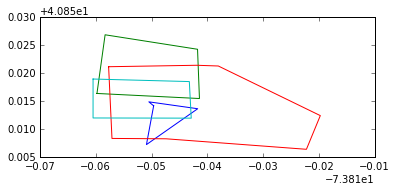

In [10]:
import matplotlib.pyplot as plt 

fig = plt.figure() 
coords = data[0][0]['geometry']['coordinates']
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]
ax = fig.gca() 
ax.plot(x,y)
ax.axis('scaled')

coords = data[0][1]['geometry']['coordinates']
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]
ax = fig.gca() 
ax.plot(x,y)
ax.axis('scaled')

coords = data[0][2]['geometry']['coordinates']
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]
ax = fig.gca() 
ax.plot(x,y)
ax.axis('scaled')

coords = data[0][3]['geometry']['coordinates']
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]
ax = fig.gca() 
ax.plot(x,y)
ax.axis('scaled')

In [11]:
len(data[0])

39

In [12]:
import colorsys

def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [13]:
colors = _get_colors(269)
print colors[:2]

[(0.9811198892896311, 0.042226591011082171, 0.04222659101108217), (0.9933260909211316, 0.047794362550141425, 0.026223296503654958)]


In [14]:
# fig = plt.figure(figsize=(16,13))
# plt.xlim(-73.9,-73.8)
# plt.ylim(40.8,40.9)

# a =0
# for b in range (len(data[a])):
#     coords = data[a][b]['geometry']['coordinates']
#     x = [i for i,j in coords[0]]
#     y = [j for i,j in coords[0]]
#     ax = fig.gca() 
#     ax.plot(x,y, c=colors[a], lw=0.2)
#     #ax.axis('scaled')

        
        
# # coords = data[0][3]['geometry']['coordinates']
# # x = [i for i,j in coords[0]]
# # y = [j for i,j in coords[0]]
# # ax = fig.gca() 
# # ax.plot(x,y)
# # ax.axis('scaled')

In [31]:
map_DCP = []
with open('Neighborhood Tabulation Areas.geojson', 'r') as f:
    map_DCP = json.load(f)

In [50]:
from shapely.geometry import MultiPoint
geo_DCP = []
for i in range(len(map_DCP['features'])):
    poly = MultiPoint(map_DCP['features'][i]['geometry']['coordinates'][0][0]).convex_hull
    geo_DCP.append(poly)

In [62]:
from matplotlib import pyplot as plt
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
ax = fig.add_subplot(111)
ring_patch = PolygonPatch(geo_DCP[p])
ax.add_patch(ring_patch)

In [91]:
data[1][1]['geometry']['coordinates'][0]

[[-73.9824914932251, 40.73125888744284],
 [-73.971848487854, 40.72693354386121],
 [-73.97459506988525, 40.72218509862994],
 [-73.97493839263916, 40.71903012236453],
 [-73.97721290588379, 40.71948548899755],
 [-73.97854328155518, 40.720136007355364],
 [-73.9885425567627, 40.72306326129451],
 [-73.9824914932251, 40.73125888744284]]

In [90]:
map_DCP['features'][1]['geometry']['coordinates'][0][0][0]

[-73.97604935657381, 40.631275905646774]

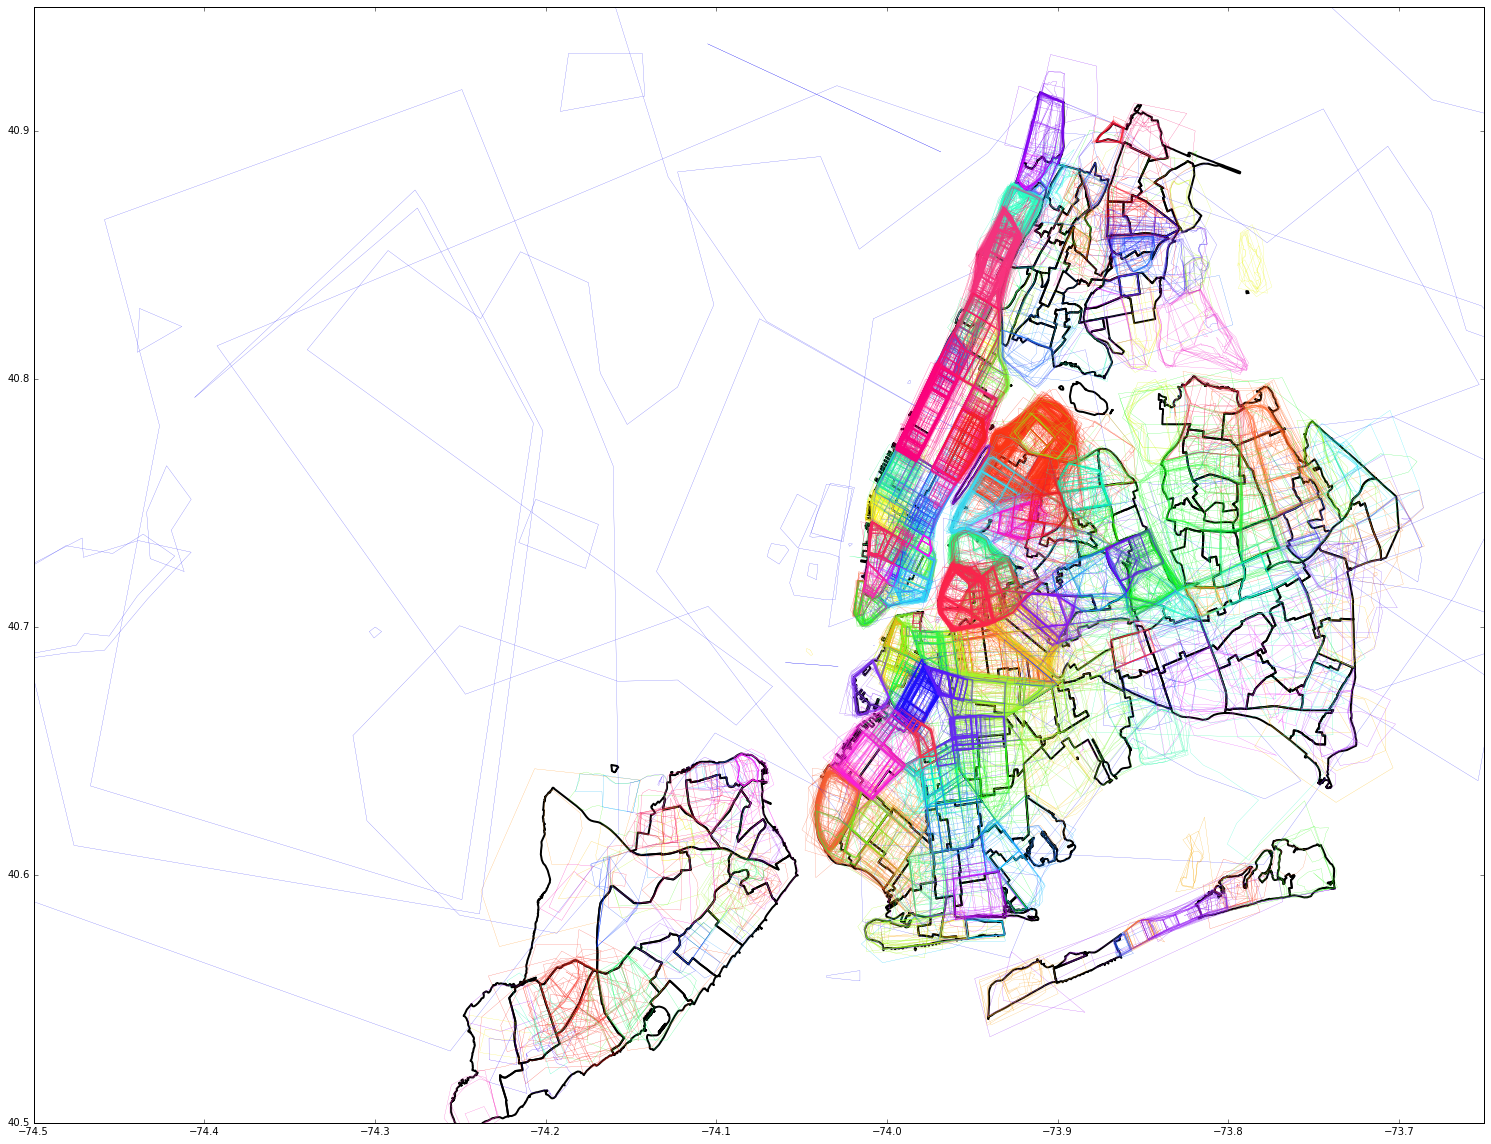

In [112]:
fig = plt.figure(figsize=(26,20))
plt.xlim(-74.5,-73.65)
plt.ylim(40.5,40.95)
for a in range (len(map_DCP['features'])):
    coords = map_DCP['features'][a]['geometry']['coordinates'][0]
    x = [i for i,j in coords[0]]
    y = [j for i,j in coords[0]]
    ax = fig.gca() 
    ax.plot(x,y, c='black', lw=2)
        
for a in range (len(data)):
    for b in range (len(data[a])):
        coords = data[a][b]['geometry']['coordinates']
        x = [i for i,j in coords[0]]
        y = [j for i,j in coords[0]]
        ax = fig.gca() 
        ax.plot(x,y, c=colors[a], lw=0.2)
        #ax.axis('scaled')

## get geometry information

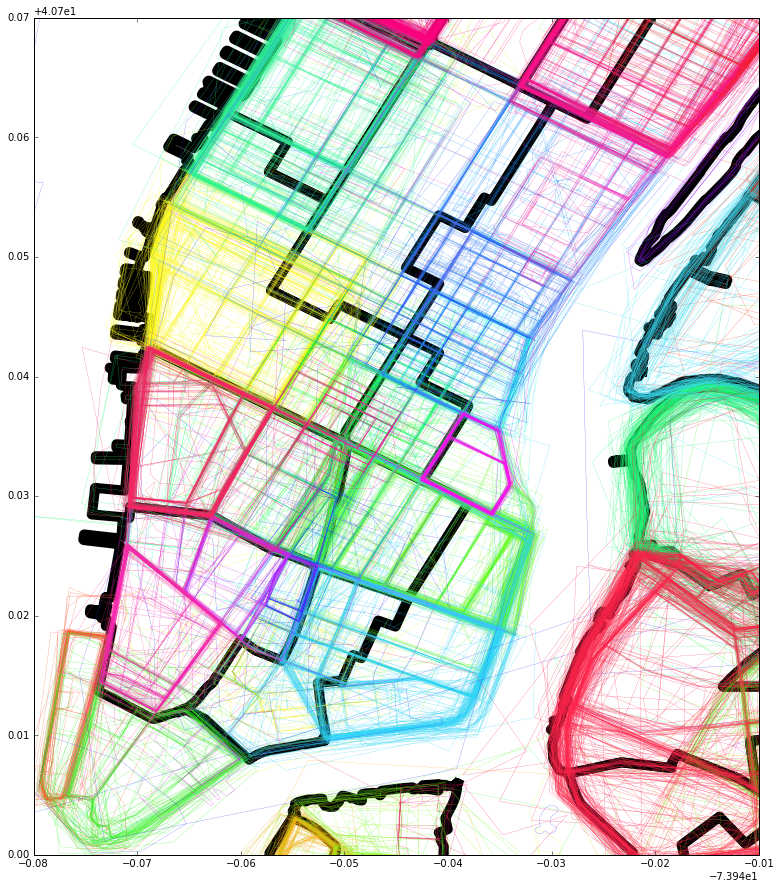

In [107]:
fig = plt.figure(figsize=(13,15))
plt.xlim(-74.02,-73.95)
plt.ylim(40.7,40.77)
for a in range (len(map_DCP['features'])):
    coords = map_DCP['features'][a]['geometry']['coordinates'][0]
    x = [i for i,j in coords[0]]
    y = [j for i,j in coords[0]]
    ax = fig.gca() 
    ax.plot(x,y, c='black', lw=10)
    
for a in range (len(data)):
    for b in range (len(data[a])):
        coords = data[a][b]['geometry']['coordinates']
        x = [i for i,j in coords[0]]
        y = [j for i,j in coords[0]]
        ax = fig.gca() 
        ax.plot(x,y, c=colors[a], lw=0.2)
        #ax.axis('scaled')

## get geometry information

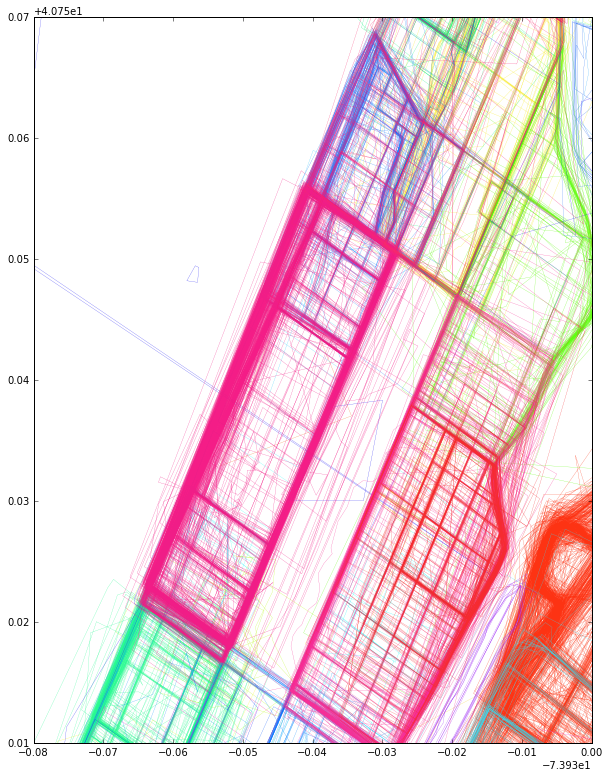

In [212]:
fig = plt.figure(figsize=(10,13))
plt.xlim(-74.01,-73.93)
plt.ylim(40.76,40.82)

for a in range (len(data)):
    for b in range (len(data[a])):
        coords = data[a][b]['geometry']['coordinates']
        x = [i for i,j in coords[0]]
        y = [j for i,j in coords[0]]
        ax = fig.gca() 
        ax.plot(x,y, c=colors[a], lw=0.2)
        #ax.axis('scaled')

## get geometry information

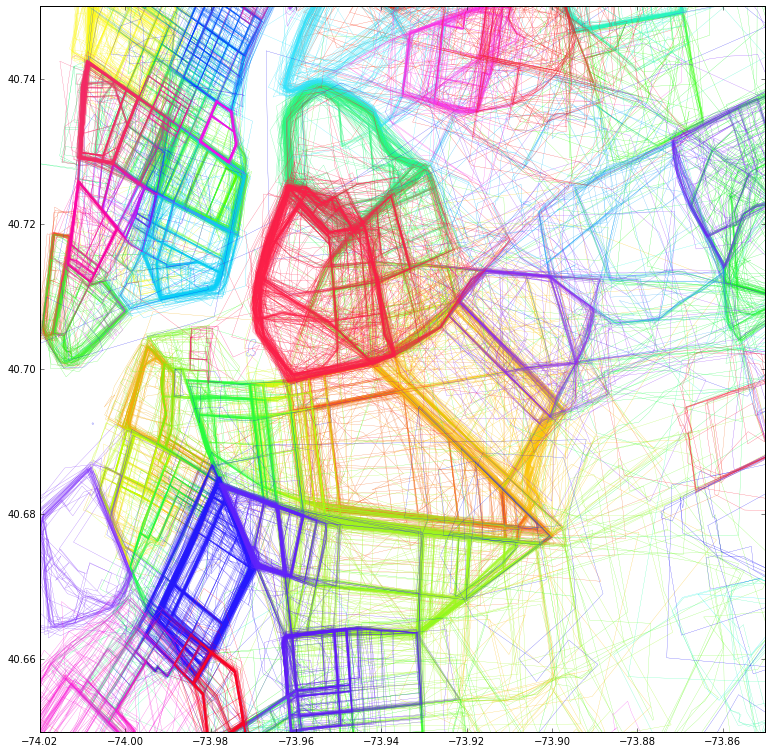

In [215]:
fig = plt.figure(figsize=(13,13))
plt.xlim(-74.02,-73.85)
plt.ylim(40.65,40.75)

for a in range (len(data)):
    for b in range (len(data[a])):
        coords = data[a][b]['geometry']['coordinates']
        x = [i for i,j in coords[0]]
        y = [j for i,j in coords[0]]
        ax = fig.gca() 
        ax.plot(x,y, c=colors[a], lw=0.2)
        #ax.axis('scaled')

## get geometry information

In [11]:
# geo info (lat,lot) grouped by communities
geo = []
for i in range(len(data)):
    geometry_info = []
    for j in range(len(data[i])):
        geometry_info.append(data[i][j]['geometry'].items()[1][1][0])
    geo.append(geometry_info)

In [14]:
len(geo)

269

In [33]:
geo[0][0]

[[-73.8596248626709, 40.86413404116329],
 [-73.86091232299805, 40.85718824395547],
 [-73.85172843933105, 40.86361475441555],
 [-73.86048316955566, 40.86484805379314],
 [-73.8596248626709, 40.86413404116329]]

__This code might be used in future, so I did not delete it.__

In [73]:
# # turn to points

# Points_geo = []
# for i in range(len(geo)):
#     Points_info = []
#     for j in range(len(geo[i])):
#         if type(geo[i][j])== Point:
#             Points_info.append(geo[i][j])
#         else:
#             lst = [Point(k) for k in geo[i][j]]
#             Points_info.append(lst)
#     Points_geo.append(Points_info)

## Centroid of each map drawing (geojson file)

In [17]:
polygon = []
centroid = []
for i in range(len(geo)):
    polygon_each_community = []
    centroid_community =[]
    for j in range(len(geo[i])):
        if type(geo[i][j])== Point:
            point_to_list_polygon = []
            for k in range(len(geo[i][j][k])):
                atri = [geo[i][j][k].x, geo[i][j][k].y]
                point_to_list_polygon.append(atri)
            point_to_list.append(point_to_list_polygon)
            polygon_each_community.append(Polygon(point_to_list))
            centroid.append(Polygon(point_to_list).centroid)
        else:
            polygon_each_community.append(Polygon(geo[i][j]))
            centroid_community.append(Polygon(geo[i][j]).centroid)
    ploygon.append(polygon_each_community)
    centroid.append(centroid_community)

In [19]:
len(centroid)

269

In [79]:
centroid[0][0].wkt

'POINT (-73.85740963962982 40.86186406469173)'

In [52]:
#make fake point 
point1 =  Point(0,0)
type(point1)

shapely.geometry.point.Point

In [56]:
x = centroid[0][0].distance(point1)
print x

84.407398334


## Centroid of each community (folder)

In [22]:
centroid_per_community = []
list_centroid = []
for i in range(len(centroid)):
    centroid_in_same_community = []
    for j in range(len(centroid[i])):
        atri = [centroid[i][j].x, centroid[i][j].y]
        centroid_in_same_community.append(atri)
    list_centroid.append(centroid_in_same_community)
    if len(centroid[i]) >= 3:
        centroid_per_community.append(Polygon(centroid_in_same_community).centroid)
    elif len(centroid[i]) == 2:
        x = (centroid[i][0].x + centroid[i][1].x)/2
        y = (centroid[i][0].y + centroid[i][1].y)/2
        atr = [x,y]
        centroid_per_community.append(atr)
    elif len(centroid[i]) == 1:
        centroid_per_community.append(list_centroid[i])

In [23]:
print len(centroid_per_community)
print len(list_centroid)

269
269


In [81]:
centroid_per_community[0].wkt

'POINT (-74.0341226852298 41.1886416663174)'

In [89]:
len(list_centroid[0])

39

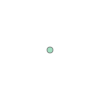

In [43]:
centroid_per_community[0]

In [147]:
listing[:10]

['allerton',
 'alphabet-city',
 'annandale',
 'arden-heights',
 'arrochar',
 'arverne',
 'astoria',
 'auburndale',
 'bath-beach',
 'battery-park-city']

In [ ]:
centroid_per_community[0].wkt

x = centroid[0][0].distance(point1)
#print x

In [85]:
centroid[0][1].distance(centroid_per_community[0])

0.362224361195435

In [93]:
#for i in range (269):
    #print type(centroid_per_community[i])
    #print type(centroid[i][0])
    #print centroid_per_community[i].distance(centroid[i][0])

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.371498454114
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.000674232576991
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.0148807247461
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.00827832716032
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.0644877240116
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.0988407421429
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.0257949284636
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.00437652401793
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.00622576565133
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
0.00109469549927
<class 'shapely.geometry.point.Point'>
<class 'shapely.

AttributeError: 'list' object has no attribute 'distance'

In [100]:
mse_community_list = []
for i in range (len(centroid)):
    dist = []
    for j in range(len(centroid[i])):
        if type(centroid[i][j])== Point and type(centroid_per_community[i])== Point:
            each_dist = centroid[i][j].distance(centroid_per_community[i])
            each_dist_sq = each_dist * each_dist
            dist.append(each_dist_sq)
    if len(dist) > 0:
        mse_community = sum(dist) / len(dist)
        mse_community_list.append(mse_community)
    else:
        mse_community_list.append('no data')

In [101]:
mse_community_list

[0.1337931061896444,
 4.788425364144118e-07,
 0.00013882173332487857,
 0.00016647171510848373,
 0.005565438019633626,
 0.010009216439866443,
 0.0006860194622537018,
 4.62235336602962e-05,
 6.635620506423935e-05,
 1.2852824462484591e-05,
 2.7051694480965776e-05,
 3.966289371991804e-05,
 3.355646168077757e-05,
 'no data',
 9.399666318126746e-05,
 'no data',
 0.0013769241692435253,
 8.941200853315774e-06,
 1.08803913598719e-05,
 1.2422808780819544e-05,
 0.00013369642662819668,
 2.009587196714731e-05,
 0.008986982646618513,
 'no data',
 'no data',
 1.0976478414029131e-05,
 0.0015494772036742245,
 3.92430487521131e-05,
 1.2925504348307044e-05,
 0.00024008107272421007,
 4.908552401942985e-06,
 0.00019588444354861546,
 0.014963342198429885,
 6.573077551261037e-05,
 'no data',
 5.311990026569705e-05,
 2.423240425533582e-05,
 0.0011229848208078813,
 1.9920516448181145e-05,
 0.002331269973131139,
 7.27369737605879e-05,
 8.983980791674202e-05,
 2.1932759687599174e-05,
 0.008514926922167385,
 1.42

In [149]:
columns = ['neighborhoods', 'mse']
df = pd.DataFrame(columns=columns)
df['neighborhoods'] = listing
df['mse'] = mse_community_list

In [197]:
avg_centroid_x_list = []
avg_centroid_y_list = []
for i in range (len(df)):
    if type(centroid_per_community[i])== Point:
        avg_centroid_x = float(centroid_per_community[i].wkt.split('(')[1].split(' ')[0])
        avg_centroid_y = float(centroid_per_community[i].wkt.split('(')[1].split(' ')[1].split(')')[0])
        avg_centroid_x_list.append(avg_centroid_x)
        avg_centroid_y_list.append(avg_centroid_y)
    else:
        avg_centroid_x_list.append('no data')
        avg_centroid_y_list.append('no data')

#avg_centroid_x_list

df['x'] = avg_centroid_x_list
df['y'] = avg_centroid_y_list

In [202]:
df

neighborhoods          mse        x        y
0                     allerton     0.133793 -74.0341  41.1886
1                alphabet-city  4.78843e-07 -73.9793  40.7248
2                    annandale  0.000138822 -74.1853  40.5404
3                arden-heights  0.000166472  -74.184  40.5537
4                     arrochar   0.00556544 -74.0471  40.6511
5                      arverne    0.0100092 -73.8294  40.6877
6                      astoria  0.000686019 -73.9376  40.7846
7                   auburndale  4.62235e-05 -73.7936  40.7623
8                   bath-beach  6.63562e-05 -74.0073  40.6096
9            battery-park-city  1.28528e-05 -74.0161  40.7132
10                   bay-ridge  2.70517e-05 -74.0321  40.6273
11                 bay-terrace  3.96629e-05 -73.7762  40.7798
12   bay-terrace-staten-island  3.35565e-05 -74.1351  40.5525
13                  baychester      no data  no data  no data
14                     bayside  9.39967e-05 -73.7734  40.7646
15                   bayswater      no data  no data  no data
16                    bed-stuy   0.00137692 -73.9496  40.7218
17                bedford-park   8.9412e-06  -73.886  40.8716
18                  beechhurst  1.08804e-05 -73.8042  40.7906
19                belle-harbor  1.24228e-05  -73.849  40.5762
20                   bellerose  0.000133696 -73.7231  40.7399
21                     belmont  2.00959e-05 -73.8848  40.8551
22                 bensonhurst   0.00898698 -73.9107  40.6475
23                bergen-beach      no data  no data  no data
24                  bloomfield      no data  no data  no data
25                 boerum-hill  1.09765e-05 -73.9878  40.6863
26                borough-park   0.00154948 -73.9938  40.6706
27                breezy-point   3.9243e-05 -73.9273  40.5537
28                   briarwood  1.29255e-05 -73.8156  40.7106
29              brighton-beach  0.000240081 -73.9785  40.5767
..                         ...          ...      ...      ...
239       tremont-east-tremont  8.80579e-05 -73.8948  40.8363
240                    tribeca  3.32954e-06  -74.008  40.7193
241                 tudor-city  1.47965e-06 -73.9721  40.7495
242                 turtle-bay  0.000253372 -73.9779   40.741
243               union-square  2.66356e-06 -73.9901  40.7355
244                  unionport      no data  no data  no data
245         university-heights  3.38205e-05 -73.9121  40.8571
246            upper-east-side      4.99966 -72.0713  41.9501
247            upper-west-side  2.04994e-05 -73.9761  40.7865
248                     utopia      no data  no data  no data
249                   van-nest      no data  no data  no data
250               vinegar-hill  2.39193e-05 -73.9857     40.7
251                  wakefield  4.01571e-05 -73.8472  40.8935
252         washington-heights      9.91557 -75.3516  38.0325
253              west-brighton  0.000202196 -74.1008  40.6347
254                 west-farms      no data  no data  no data
255                west-harlem  0.000304001 -73.9591   40.802
256               west-village    0.0129642 -74.1004  40.7961
257         westchester-square      no data  no data  no data
258                westerleigh  0.000334008 -74.1464  40.6094
259                 whitestone  5.01483e-05 -73.8144  40.7835
260             williamsbridge    0.0126251  -73.967  40.6948
261               williamsburg  0.000122781 -73.9605   40.719
262                willowbrook  5.49424e-05 -74.1466  40.5993
263            windsor-terrace   0.00671604 -73.8976  40.6679
264                  woodhaven  3.11465e-05 -73.8538  40.6937
265                   woodlawn   0.00045233 -73.8468  40.8999
266                    woodrow      no data  no data  no data
267                   woodside  8.65406e-05 -73.8977  40.7506
268                  yorkville  3.33172e-05 -73.9492  40.7778

[269 rows x 4 columns]

In [201]:
#df.to_csv('MSE_dnainfo.csv')
#df_sort.to_csv('MS_dnainfo_revised.csv')

In [199]:
df_sort = df[df.mse!='no data'].sort(columns = 'mse')
df_sort

C:\Users\Boyeong\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


neighborhoods          mse        x        y
205                     roosevelt-island   3.5531e-07 -73.9504  40.7616
1                          alphabet-city  4.78843e-07 -73.9793  40.7248
173                                nomad  1.25859e-06 -73.9855   40.745
241                           tudor-city  1.47965e-06 -73.9721  40.7495
220                 south-street-seaport  1.62916e-06 -74.0035  40.7078
56   columbia-street-waterfront-district   1.8073e-06 -74.0026  40.6856
48                          civic-center  2.15625e-06 -74.0049  40.7138
206                             rosebank  2.38933e-06  -74.071  40.6117
243                         union-square  2.66356e-06 -73.9901  40.7355
171                                 noho  3.32282e-06 -73.9931   40.727
240                              tribeca  3.32954e-06  -74.008  40.7193
172                               nolita  3.41071e-06 -73.9947  40.7213
54                           cobble-hill  3.89772e-06 -73.9965  40.6859
222                       spuyten-duyvil  4.01677e-06 -73.9173  40.8832
87                    financial-district  4.22596e-06 -74.0109  40.7075
119                        hudson-square  4.83178e-06 -74.0068  40.7279
30                         broad-channel  4.90855e-06 -73.8198  40.6046
232                         sutton-place  5.02537e-06  -73.963  40.7587
227                            stuy-town  5.06573e-06 -73.9779  40.7339
89                              flatiron  5.41865e-06 -73.9893  40.7405
104                             grasmere  6.33208e-06 -74.0805  40.6008
101                              gowanus  6.38285e-06 -73.9909  40.6748
182                           park-slope  6.60223e-06 -73.9809  40.6712
47                           city-island  6.77306e-06 -73.7853  40.8455
169                             new-dorp  6.82827e-06 -74.1139  40.5704
55                         college-point  6.86653e-06  -73.843  40.7842
237                          tottenville  7.28278e-06  -74.242  40.5052
57                       columbus-circle  7.59248e-06  -73.982  40.7682
17                          bedford-park   8.9412e-06  -73.886  40.8716
137                         little-italy  9.34376e-06 -73.9968  40.7185
..                                   ...          ...      ...      ...
156                         midtown-east   0.00115881 -74.0024  40.7442
77                     east-williamsburg   0.00127837 -73.9687  40.7303
16                              bed-stuy   0.00137692 -73.9496  40.7218
107                           greenpoint   0.00154857 -73.9335  40.6927
26                          borough-park   0.00154948 -73.9938  40.6706
126                        jamaica-hills   0.00175608 -73.8357  40.7205
39                       carroll-gardens   0.00233127 -74.0432  40.6648
52                          clinton-hill   0.00265556 -73.9757   40.739
185                           pelham-bay   0.00344751 -73.8873  40.8345
127                           kensington   0.00427345 -74.0393  40.6306
4                               arrochar   0.00556544 -74.0471  40.6511
140                     long-island-city   0.00559766 -73.8689  40.7563
263                      windsor-terrace   0.00671604 -73.8976  40.6679
43                            charleston   0.00851493 -74.2895  40.5158
22                           bensonhurst   0.00898698 -73.9107  40.6475
5                                arverne    0.0100092 -73.8294  40.6877
260                       williamsbridge    0.0126251  -73.967  40.6948
256                         west-village    0.0129642 -74.1004  40.7961
32                            brookville    0.0149633 -73.7015  40.7356
219                     south-ozone-park    0.0149907 -73.9069  40.6028
196                        randall-manor    0.0731978 -73.8928  40.4697
0                               allerton     0.133793 -74.0341  41.1886
102                             gramercy     0.972478  -73.091  40.3139
246                      upper-east-side      4.99966 -72.0713  41.

In [182]:
centroid_per_community[15][0]

[-73.76369690263613, 40.60678343917353]

In [162]:
centroid_per_community[0].wkt.split('(')[1].split(' ')[0]

'-74.0341226852298'

In [164]:
centroid_per_community[0].wkt.split('(')[1].split(' ')[1].split(')')[0]

'41.1886416663174'

## * Clustering
## * using label mapping again